In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'December 2017'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14
2017-11-30     1930   1669         54   11   0     2     85     183      15
2017-12-31     2375   2035         45   11   0     2     89     110      11

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-12-31      445    366         -9   0   0     0      4     -73      -4

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

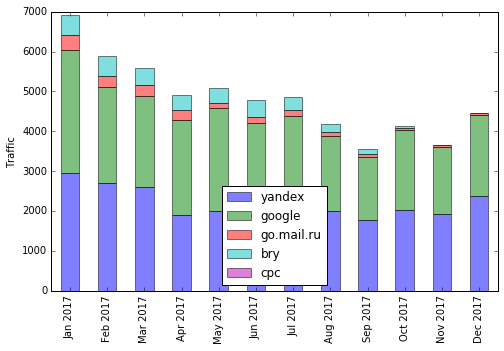

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

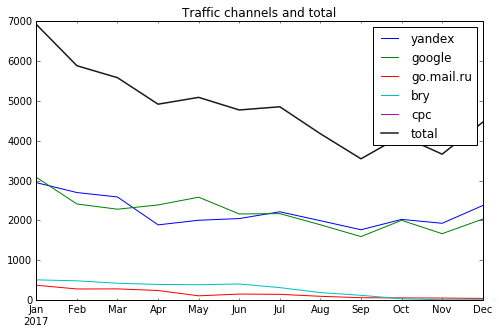

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                                amazon      2
           1                             np - /?cnt=catalog&r=2438      1
           2     np - /?pid=menu-katalog&yclid=7370394728357968271      1
           3                                                скидки      1
go.mail.ru 0                                             (not set)     45
google     0                             np - /?cnt=catalog&r=2438    206
           1                                                np - /    140
           2                                         полотно двери    108
           3                             np - /?cnt=catalog&r=1428    105
           4                                      np - /?pid=pokaz     78
           5                                     полотно для двери     25
           6                               np - /?pid=menu-katalog     11
           7                             np - /?cnt=catalog&r=1010      9
           8                             np - /?cnt=catalog&r=1792      6
           9                             np - /?cnt=catalog&r=2184      6
           10                             np - /?cnt=catalog&r=530      6
           11                                      полотна дверные      6
           12                            np - /?cnt=catalog&r=2553      5
           13                            np - /?cnt=catalog&r=3124      5
           14                             np - /?cnt=catalog&r=448      5
           15                             np - /?cnt=catalog&r=999      5
           16                                  np - /?pid=dostavka      5
           17                            np - /?cnt=catalog&r=1257      4
           18                            np - /?cnt=catalog&r=1432      3
           19                            np - /?cnt=catalog&r=1475      3
           20                              np - /?cnt=catalog&r=57      3
           21                                   np - /?pid=contact      3
           22                                       np - /?pid=faq      3
           23                                      дверное полотно      3
           24                               дверные полотна купить      3
...                                                            ...    ...
yandex     1463                        фрезеровка дверного полотна      1
           1464       фурнитура для двери гармошки из двух полотен      1
           1465       фурнитура для кухни петля для двойной дверцы      1
           1466  фурнитура для складных дверей книжка на два по...      1
           1467  цвета фурнитуры для дверей мебельная фурнитура...      1
           1468                            цветное дверное полотно      1
           1469                     цветное дверное полотно в офис      1
           1470                  цветные стекла для кухонной двери      1
           1471                            цельное дверное полотно      1
           1472                             цены на двери на кухню      1
           1473  частное лицо плотник для установки дверного по...      1
           1474  чем заделать щель между раздвижными полотнами ...      1
           1475                        чем заменить дверь на кухне      1
           1476                  чем можно заменить дверь на кухню      1
           1477                      чем укоротить полотно дверное      1
           1478                           чистое полотно для двери      1
           1479                    что повесить над дверью в кухню      1
           1480  что сначала вставить дверь на кухне или положи...      1
           1481                   чтобы не хлопали дверцы на кухне      1
           1482                         шаблон под дверные полотна      1
           1483                      ширина 60 см дверок для кухни      1
           1484  ширина дверного полотна 70+ коллекция иллюстраций      1
           1485                              ширина кухонной дв

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,amazon,2
go.mail.ru,(not set),45
google,np - /?cnt=catalog&r=2438,206
rambler,двери шпон межкомнатные натуральный дуб,2
yahoo,np - /,1
yandex,(not set),670


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                             amazon      2
           1                          np - /?cnt=catalog&r=2438      1
           2  np - /?pid=menu-katalog&yclid=7370394728357968271      1
           3                                             скидки      1
go.mail.ru 0                                          (not set)     45
google     0                          np - /?cnt=catalog&r=2438    206
           1                                             np - /    140
           2                                      полотно двери    108
           3                          np - /?cnt=catalog&r=1428    105
           4                                   np - /?pid=pokaz     78
rambler    0            двери шпон межкомнатные натуральный дуб      2
           1                                     ldthb gjl rk.x      1
           2                                      двери ильдорф      1
           3           межкомнатные двери под ключ с установкой      1
yahoo      0                                             np - /      1
yandex     0                                          (not set)    670
           1                                       took-took.ru      9
           2                                              двери      1
           3                         двери межкомнатные двойные      1
           4                                    двери рязанский      1